## Import all Libraries

In [57]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gather Training and Testing Data

In [58]:
# Read in dataframe
df = pd.read_csv('fbdh1.csv')

In [59]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68


In [4]:
def label_fix(label):
    if label < -7.5:
        return 0
    elif label > 7.5:
        return 1
    else:
        return 2

df['Class'] = df['Flow'].apply(label_fix)

## Scale and Create Feature Matrix

In [5]:
# Create the Feature Matrix and Scale Features
X = df.drop('Class', axis = 1)
X.drop('Flow', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns = X.columns[:])

# Create the classification matrix
y = df['Class']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

columns = ['D1', 'D2', 'P1', 'P2', 'dD1', 'dD2', 'dP1', 'dP2']

## EDA

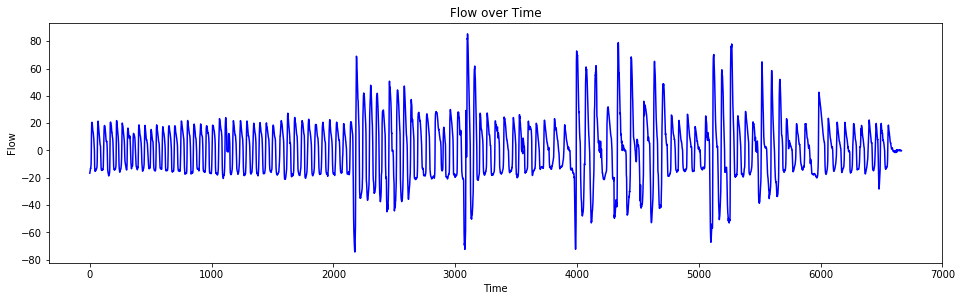

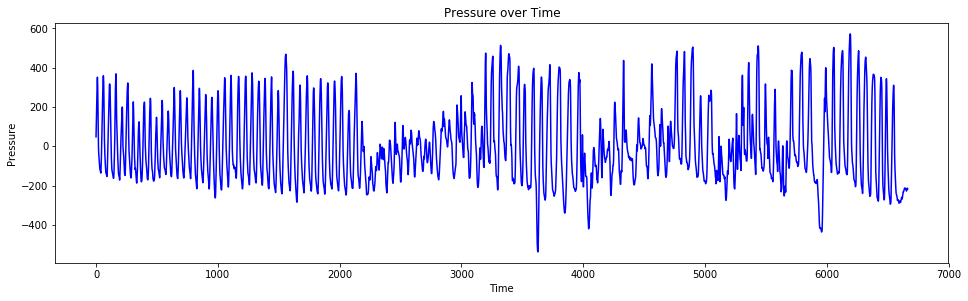

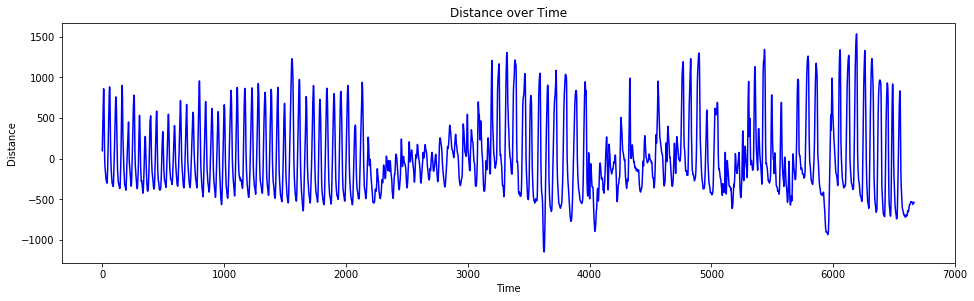

In [68]:
time = range(0, 6664)
flow = df['Flow']
pressure = df['P1']
distance = df['D1']

fig = plt.figure(figsize = (16, 15))
plt.subplot(3,1,1)
plt.plot(time, flow, 'b') # 'r' is the color red
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

fig = plt.figure(figsize = (16, 15))
plt.subplot(3,1,2)
plt.plot(time, pressure, 'b')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure over Time')
plt.show()

fig = plt.figure(figsize = (16, 15))
plt.subplot(3,1,2)
plt.plot(time, distance, 'b')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance over Time')
plt.show()

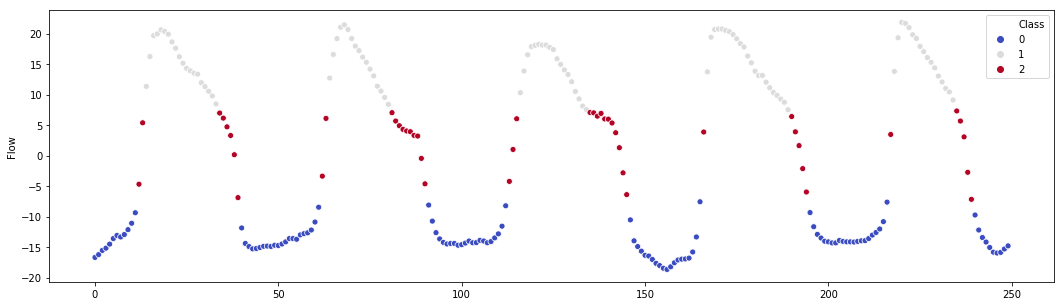

In [69]:
fig = plt.figure(figsize = (18, 5))
sns.scatterplot(y = df['Flow'][0:250], x = range(0, 250), hue = df['Class'][0:250], palette = 'coolwarm')

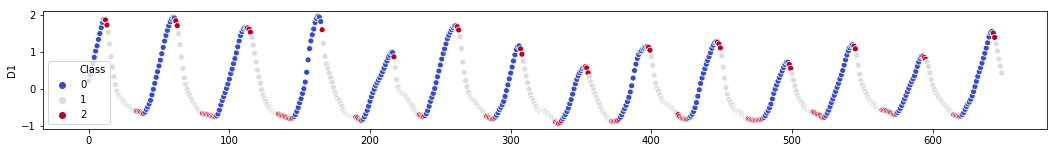

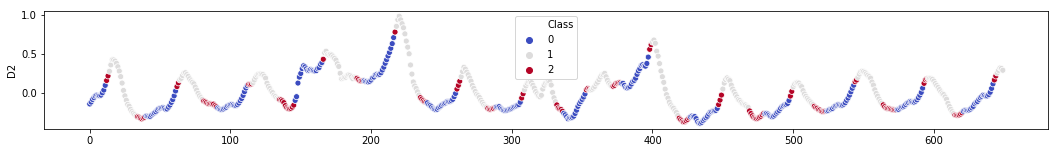

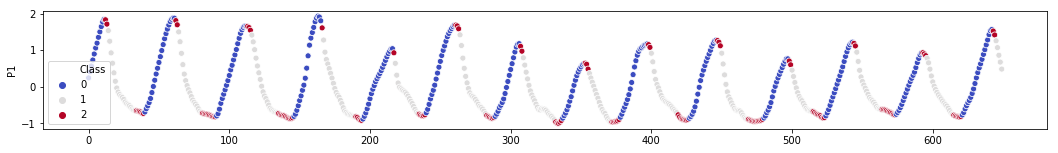

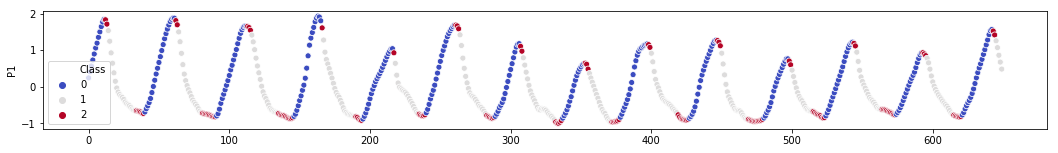

In [65]:
fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 1)
sns.scatterplot(y = X['D1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 2)
sns.scatterplot(y = X['D2'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 3)
sns.scatterplot(y = X['P1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 4)
sns.scatterplot(y = X['P1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')


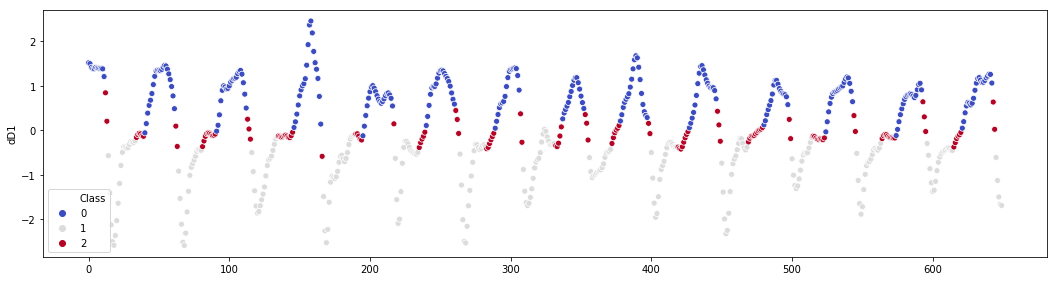

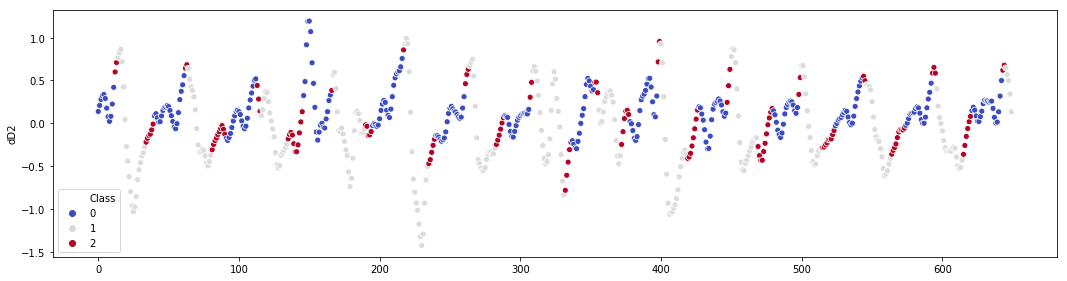

In [66]:
fig = plt.figure(figsize = (18, 10))
plt.subplot(2, 1, 1)
sns.scatterplot(y = X['dD1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(2, 1, 2)
sns.scatterplot(y = X['dD2'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

## Develop Keras Model

### Ideal Parameters

{'Dense_1': 150, 'Dense_2': 50, 'Dropout_1': 0.3, 'Dropout_2': 0.4, 'epochs': 50}
0.9060891938250428

In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

W0909 22:40:50.290135 4672464320 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1350      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                7550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 9,053
Trainable params: 9,053
Non-trainable params: 0
_________________________________________________________________


In [8]:
EPOCHS = 50
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/50
4664/4664 [==============================] - 0s 45us/sample - loss: 0.5493 - acc: 0.7948
Epoch 2/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.3564 - acc: 0.8570
Epoch 3/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.3334 - acc: 0.8699
Epoch 4/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.3202 - acc: 0.8780
Epoch 5/50
4664/4664 [==============================] - 0s 23us/sample - loss: 0.3053 - acc: 0.8829
Epoch 6/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.3072 - acc: 0.8801
Epoch 7/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.2862 - acc: 0.8898
Epoch 8/50
4664/4664 [==============================] - 0s 23us/sample - loss: 0.2946 - acc: 0.8877
Epoch 9/50
4664/4664 [==============================] - 0s 23us/sample - loss: 0.2825 - acc: 0.8894
Epoch 10/50
4664/4664 [==============================] - 0s 22us/sample - loss: 0.2814 - acc: 0.8917

In [9]:
# Scoring the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2000/2000 [==============================] - 0s 28us/sample - loss: 0.2415 - acc: 0.9095
Test accuracy: 0.9095
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       829
           1       0.94      0.91      0.93       802
           2       0.74      0.84      0.79       369

   micro avg       0.91      0.91      0.91      2000
   macro avg       0.88      0.90      0.89      2000
weighted avg       0.91      0.91      0.91      2000



## Test Model on New Data

In [10]:
# Read in dataframe
test = pd.read_csv('test_data_2.csv')
test['Class'] = test['Flow'].apply(label_fix)

In [11]:
test.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-18.06,108.35,-145.16,84.37,-16.80,362.56,12.29,80.06,1.74,0
1,-18.06,455.13,-139.07,148.93,-15.90,354.47,8.35,73.30,1.30,0
2,-18.23,761.09,-144.06,202.42,-15.86,342.88,3.15,66.64,0.78,0
3,-18.94,1010.37,-161.04,243.71,-17.84,322.09,-3.10,59.18,0.03,0
4,-19.26,1350.27,-172.37,297.91,-19.24,313.99,-8.30,54.45,-0.74,0


In [12]:
# Create the Feature Matrix and Scale Features
X_1 = test.drop('Class', axis = 1)
X_1.drop('Flow', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X_1)
scaled_features = scaler.transform(X_1)
X_1 = pd.DataFrame(scaled_features, columns = X_1.columns[:])

# Create the classification matrix
y_1 = test['Class']

In [13]:
loss, acc = model.evaluate(X_1, y_1)
print('Test accuracy:', acc)

test_predictions = model.predict(X_1)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))
    
print(classification_report(y_1, final_pred_test))

5019/5019 [==============================] - 0s 14us/sample - loss: 0.6212 - acc: 0.8482
Test accuracy: 0.84817696
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2145
           1       0.88      0.87      0.88      2074
           2       0.73      0.65      0.69       800

   micro avg       0.85      0.85      0.85      5019
   macro avg       0.82      0.81      0.81      5019
weighted avg       0.85      0.85      0.85      5019



## EDA on New Data

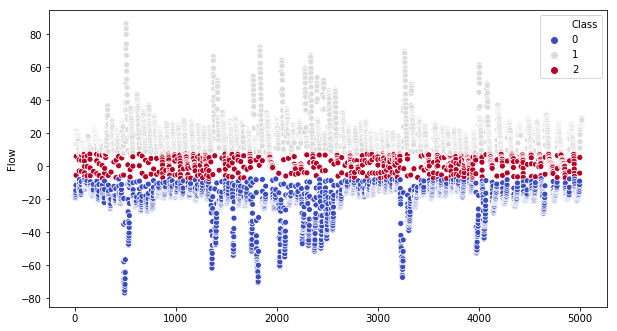

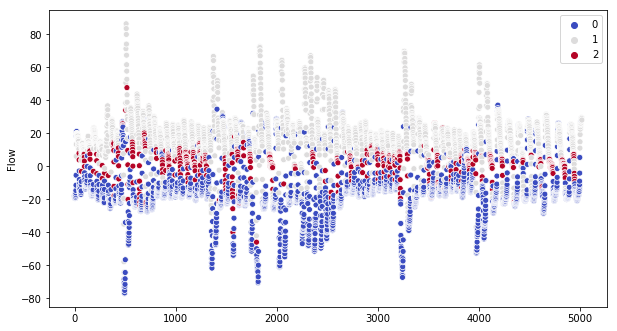

In [60]:
fig = plt.figure(figsize = (10, 12))

time_2 = range(0, 5019)

plt.subplot(2, 1, 1)
sns.scatterplot(x = time_2, y = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(x = time_2, y = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

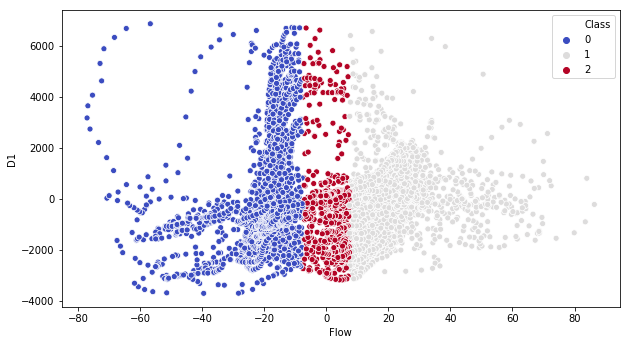

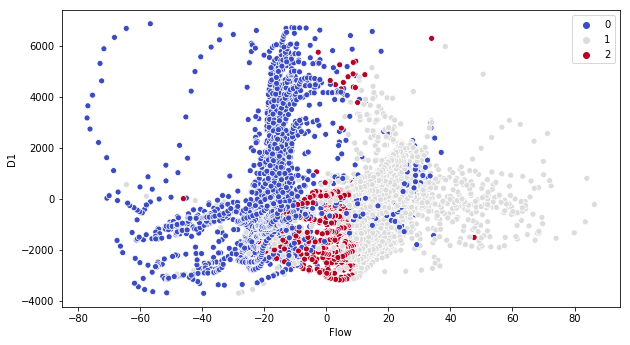

In [61]:
fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

## Save Keras File as TensorFlow Lite

In [292]:
keras_file = "model_Sept_5.h5"

In [293]:
keras.models.save_model(model, keras_file)

In [294]:
converter = tf.lite.TocoConverter.from_keras_model_file(keras_file)

In [295]:
tflite_model = converter.convert()

In [296]:
open("test_save_2.tflite", "wb").write(tflite_model)

8280

## Decision Algorithm

In [115]:
X_test.drop('Predictions', axis = 1, inplace = True)

In [116]:
X_test.reset_index(drop = True, inplace = True)

In [117]:
X_test.head()

,D1,D2,P1,P2,dD1,dD2,dP1,dP2
0,0.584939,-0.065525,0.648936,0.254332,-3.840340,1.970655,-3.489322,2.199837
1,0.083791,-1.051707,-0.006411,-1.118192,-0.534863,-0.486386,-0.607459,-0.741580
2,-0.354661,-0.209313,-0.345093,-0.362398,1.159578,-0.007185,1.374484,0.077347
3,-0.994952,-0.213363,-1.030692,-0.414980,0.173133,-0.096128,0.208771,-0.065006
4,0.803281,-0.161260,0.850666,0.460231,0.626243,-1.267471,0.641487,-1.338180


In [118]:
X_test['Predictions'] = list(final_pred)

/Users/mikefurr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
X_test.head()

,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Predictions
0,0.584939,-0.065525,0.648936,0.254332,-3.840340,1.970655,-3.489322,2.199837,1
1,0.083791,-1.051707,-0.006411,-1.118192,-0.534863,-0.486386,-0.607459,-0.741580,1
2,-0.354661,-0.209313,-0.345093,-0.362398,1.159578,-0.007185,1.374484,0.077347,0
3,-0.994952,-0.213363,-1.030692,-0.414980,0.173133,-0.096128,0.208771,-0.065006,0
4,0.803281,-0.161260,0.850666,0.460231,0.626243,-1.267471,0.641487,-1.338180,1


In [124]:
decisionClass = []

for i in range(0, X_test['Predictions'].size):
    
    if i <= X_test['Predictions'].size - 3:
        
        if X_test['Predictions'][i] == 0 and X_test['Predictions'][i + 1] == 0 and X_test['Predictions'][i + 2] == 0:
            decisionClass.append(0)
            
        elif X_test['Predictions'][i] == 1 and X_test['Predictions'][i + 1] == 1 and X_test['Predictions'][i + 2] == 1:
            decisionClass.append(1)
            
        elif X_test['Predictions'][i] == 2 and X_test['Predictions'][i + 1] == 2 and X_test['Predictions'][i + 2] == 2:
            decisionClass.append(2)
            
    else:
        
        if X_test['Predictions'][i] == 0 and X_test['Predictions'][i - 1] == 0 and X_test['Predictions'][i - 2] == 0:
            decisionClass.append(0)
            
        elif X_test['Predictions'][i] == 1 and X_test['Predictions'][i - 1] == 1 and X_test['Predictions'][i - 2] == 1:
            decisionClass.append(1)
            
        elif X_test['Predictions'][i] == 2 and X_test['Predictions'][i - 1] == 2 and X_test['Predictions'][i - 2] == 2:
            decisionClass.append(2)

In [125]:
decisionClass

[2,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
